<a href="https://colab.research.google.com/github/LucyMariel/Lucy/blob/master/DIVICLogRegScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Scratch Logistic Regression**
Please implement the method of logistic regression assumption function in ScratchLogisticRegression class.

The assumed function for logistic regression is the assumed function for linear regression passed through the Sigmoid function. The sigmoid function is represented by the following equation

g(z)=1/1+e−z



In [ ]:
import numpy as np

class ScratchLogisticRegression:
    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False, lam=0.0):
        self.num_iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.lam = lam
        self.theta = None
    #Creating the function (formula)
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def add_bias(self, X):
        return np.c_[np.ones((X.shape[0], 1)), X]

    def compute_cost(self, h, y):
        m = y.shape[0]
        cost = (-1 / m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h))) + (self.lam / (2 * m)) * np.sum(np.square(self.theta[1:]))
        return cost
    #Adding a method _gradient_descent that updates the parameters
    def _gradient_descent(self, X, y):
        m = y.shape[0]
        z = X.dot(self.theta)
        h = self.sigmoid(z)
        gradient = (1 / m) * X.T.dot(h - y)
        regularization_term = (self.lam / m) * np.r_[0, self.theta[1:]]
        self.theta -= self.lr * (gradient + regularization_term)

    def fit(self, X_train, y_train, X_test=None, y_test=None):
        if not self.no_bias:
            X_train = self.add_bias(X_train)
            if X_test is not None:
                X_test = self.add_bias(X_test)

        self.theta = np.zeros(X_train.shape[1])

        for i in range(self.num_iter):
            self._gradient_descent(X_train, y_train)

            if self.verbose and i % 100 == 0:
                z = X_train.dot(self.theta)
                h = self.sigmoid(z)
                cost = self.compute_cost(h, y_train)
                print(f"Iteration {i}, Cost: {cost}")

                if X_test is not None and y_test is not None:
                    predictions = self.predict(X_test)
                    accuracy = np.mean(predictions == y_test)
                    print(f"Iteration {i}, Test Accuracy: {accuracy}")
    #Addng to the predict method and predict_proba method
    def predict_proba(self, X):
        if not self.no_bias:
            X = self.add_bias(X)
        return self.sigmoid(X.dot(self.theta))

    def predict(self, X):
        return self.predict_proba(X) >= 0.5

# Example usage:
# slr = ScratchLogisticRegression(num_iter=10, lr=0.01, no_bias=True, verbose=True, lam=0.1)
# slr.fit(X_train, y_train, X_test, y_test)

In [ ]:
import numpy as np

class ScratchLogisticRegression:
    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False, lam=0.0):
        self.num_iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.lam = lam
        self.theta = None
    #Creating the function (formula)
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def add_bias(self, X):
        return np.c_[np.ones((X.shape[0], 1)), X]
   #Adding the compute cost for the Lost function (Added on def fit)
    def compute_cost(self, h, y):
        m = y.shape[0]
        cost = (-1 / m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h))) + (self.lam / (2 * m)) * np.sum(np.square(self.theta[1:]))
        return cost
    #Adding a method _gradient_descent that updates the parameters
    def _gradient_descent(self, X, y):
        m = y.shape[0]
        z = X.dot(self.theta)
        h = self.sigmoid(z)
        gradient = (1 / m) * X.T.dot(h - y)
        regularization_term = (self.lam / m) * np.r_[0, self.theta[1:]]
        self.theta -= self.lr * (gradient + regularization_term)

    def fit(self, X_train, y_train, X_test=None, y_test=None):
        if not self.no_bias:
            X_train = self.add_bias(X_train)
            if X_test is not None:
                X_test = self.add_bias(X_test)

        self.theta = np.zeros(X_train.shape[1])

        for i in range(self.num_iter):
            self._gradient_descent(X_train, y_train)

            if self.verbose and i % 100 == 0:
                z = X_train.dot(self.theta)
                h = self.sigmoid(z)
                cost = self.compute_cost(h, y_train)
                print(f"Iteration {i}, Cost: {cost}")

                if X_test is not None and y_test is not None:
                    predictions = self.predict(X_test)
                    accuracy = np.mean(predictions == y_test)
                    print(f"Iteration {i}, Test Accuracy: {accuracy}")
     #Addng to the predict method and predict_proba method
    def predict_proba(self, X):
        if not self.no_bias:
            X = self.add_bias(X)
        return self.sigmoid(X.dot(self.theta))

    def predict(self, X):
        return self.predict_proba(X) >= 0.5

# Example usage:
# slr = ScratchLogisticRegression(num_iter=1000, lr=0.01, no_bias=True, verbose=True, lam=0.1)
# slr.fit(X_train, y_train, X_test, y_test)


In [ ]:
import numpy as np

class ScratchLogisticRegression:
    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False, lam=0.0):
        self.num_iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.lam = lam
        self.theta = None
    #Creating the function (formula)
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def add_bias(self, X):
        return np.c_[np.ones((X.shape[0], 1)), X]
    #Adding lost function to compute the cost
    def _loss_func(self, pred, y):
        m = y.shape[0]
        error = -np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))
        loss = error / m
        loss += (self.lam / (2 * m)) * np.sum(self.theta[1:]**2)
        return loss
    #Adding a method _gradient_descent that updates the parameters
    def _gradient_descent(self, X, y):
        m = y.shape[0]
        z = X.dot(self.theta)
        h = self.sigmoid(z)
        gradient = (1 / m) * X.T.dot(h - y)
        regularization_term = (self.lam / m) * np.r_[0, self.theta[1:]]
        self.theta -= self.lr * (gradient + regularization_term)

    def fit(self, X_train, y_train, X_test=None, y_test=None):
        if not self.no_bias:
            X_train = self.add_bias(X_train)
            if X_test is not None:
                X_test = self.add_bias(X_test)

        self.theta = np.zeros(X_train.shape[1])

        for i in range(self.num_iter):
            self._gradient_descent(X_train, y_train)

            if self.verbose and i % 100 == 0:
                z = X_train.dot(self.theta)
                h = self.sigmoid(z)
                cost = self._loss_func(h, y_train)
                print(f"Iteration {i}, Cost: {cost}")

                if X_test is not None and y_test is not None:
                    predictions = self.predict(X_test)
                    accuracy = np.mean(predictions == y_test)
                    print(f"Iteration {i}, Test Accuracy: {accuracy}")
    #Addng to the predict method and predict_proba method
    def predict_proba(self, X):
        if not self.no_bias:
            X = self.add_bias(X)
        return self.sigmoid(X.dot(self.theta))

    def predict(self, X):
        return self.predict_proba(X) >= 0.5


**Verification**

Learn and estimate the scratch implementation for the binary classification of virgicolor and virginica in the iris data set provided in the Introduction to Scratch Machine Learning Sprint

**Problem 5**

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

class ScratchLogisticRegression:
    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False, lam=0.0):
        self.num_iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.lam = lam
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def add_bias(self, X):
        return np.c_[np.ones((X.shape[0], 1)), X]

    def _loss_func(self, pred, y):
        m = y.shape[0]
        error = -np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))
        loss = error / m
        if self.lam != 0:
            loss += (self.lam / (2 * m)) * np.sum(self.theta[1:]**2)
        return loss

    def _gradient_descent(self, X, y):
        m = y.shape[0]
        z = X.dot(self.theta)
        h = self.sigmoid(z)
        gradient = (1 / m) * X.T.dot(h - y)
        regularization_term = (self.lam / m) * np.r_[0, self.theta[1:]]
        self.theta -= self.lr * (gradient + regularization_term)

    def fit(self, X_train, y_train, X_test=None, y_test=None):
        if not self.no_bias:
            X_train = self.add_bias(X_train)
            if X_test is not None:
                X_test = self.add_bias(X_test)

        self.theta = np.zeros(X_train.shape[1])  # Initialize theta based on X_train's shape

        for i in range(self.num_iter):
            self._gradient_descent(X_train, y_train)

            if self.verbose and i % 100 == 0:
                z_train = X_train.dot(self.theta)
                h_train = self.sigmoid(z_train)
                cost_train = self._loss_func(h_train, y_train)
                print(f"Iteration {i}, Train Cost: {cost_train}")

                if X_test is not None and y_test is not None:
                    z_test = X_test.dot(self.theta[:X_test.shape[1]])  # Ensure theta matches X_test's shape
                    h_test = self.sigmoid(z_test)
                    cost_test = self._loss_func(h_test, y_test)
                    print(f"Iteration {i}, Test Cost: {cost_test}")

    def predict_proba(self, X):
        if not self.no_bias:
            X = self.add_bias(X)
        return self.sigmoid(X.dot(self.theta[:X.shape[1]]))  # Ensure theta matches X's shape

    def predict(self, X):
        return self.predict_proba(X) >= 0.5

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Filter for "versicolor" and "virginica"
df = df[df['species'].isin([1, 2])]

# Update features and target
X = df.drop(columns=['species']).values
y = df['species'].values

# Convert target to binary: 0 for "versicolor" and 1 for "virginica"
y = np.where(y == 1, 0, 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
slr = ScratchLogisticRegression(num_iter=1000, lr=0.01, no_bias=False, verbose=True, lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)

# Predict on the test set
y_pred = slr.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.2f}")


Iteration 0, Train Cost: 0.6893857620029267
Iteration 0, Test Cost: 0.694560685996125
Iteration 100, Train Cost: 0.6405696008106692
Iteration 100, Test Cost: 0.6739419376898511
Iteration 200, Train Cost: 0.602605140659553
Iteration 200, Test Cost: 0.6426006956201317
Iteration 300, Train Cost: 0.5687804941044519
Iteration 300, Test Cost: 0.6147225951398145
Iteration 400, Train Cost: 0.5385851916165351
Iteration 400, Test Cost: 0.5898780913749243
Iteration 500, Train Cost: 0.5115629793600881
Iteration 500, Test Cost: 0.5676856914089428
Iteration 600, Train Cost: 0.48731179934438457
Iteration 600, Test Cost: 0.5478105315816207
Iteration 700, Train Cost: 0.4654808361425617
Iteration 700, Test Cost: 0.5299610501666262
Iteration 800, Train Cost: 0.4457659885833421
Iteration 800, Test Cost: 0.5138847213488479
Iteration 900, Train Cost: 0.427904705269393
Iteration 900, Test Cost: 0.49936350074498664
Test Accuracy: 0.90


**[Problem 6] Plot of learning curve**

Iteration 0, Test Cost: 0.694560685996125
Iteration 100, Test Cost: 0.6739419376898511
Iteration 200, Test Cost: 0.6426006956201317
Iteration 300, Test Cost: 0.6147225951398145
Iteration 400, Test Cost: 0.5898780913749243
Iteration 500, Test Cost: 0.5676856914089428
Iteration 600, Test Cost: 0.5478105315816207
Iteration 700, Test Cost: 0.5299610501666262
Iteration 800, Test Cost: 0.5138847213488479
Iteration 900, Test Cost: 0.49936350074498664


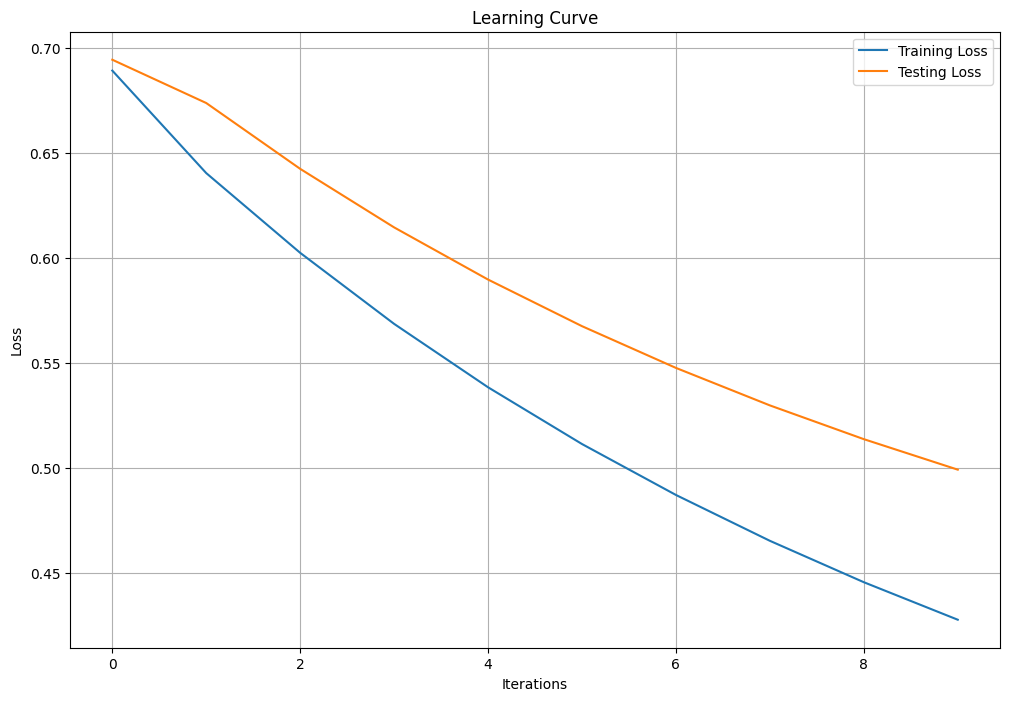

Test Accuracy: 0.90


In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class ScratchLogisticRegression:
    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False, lam=0.0):
        self.num_iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.lam = lam
        self.theta = None
        self.train_costs = []  # To store training costs
        self.test_costs = []   # To store testing costs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def add_bias(self, X):
        return np.c_[np.ones((X.shape[0], 1)), X]

    def _loss_func(self, pred, y):
        m = y.shape[0]
        error = -np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))
        loss = error / m
        if self.lam != 0:
            loss += (self.lam / (2 * m)) * np.sum(self.theta[1:]**2)
        return loss

    def _gradient_descent(self, X, y):
        m = y.shape[0]
        z = X.dot(self.theta)
        h = self.sigmoid(z)
        gradient = (1 / m) * X.T.dot(h - y)
        regularization_term = (self.lam / m) * np.r_[0, self.theta[1:]]
        self.theta -= self.lr * (gradient + regularization_term)

    def fit(self, X_train, y_train, X_test=None, y_test=None):
        if not self.no_bias:
            X_train = self.add_bias(X_train)
            if X_test is not None:
                X_test = self.add_bias(X_test)

        self.theta = np.zeros(X_train.shape[1])  # Initialize theta based on X_train's shape

        for i in range(self.num_iter):
            self._gradient_descent(X_train, y_train)

            if self.verbose and i % 100 == 0:
                z_train = X_train.dot(self.theta)
                h_train = self.sigmoid(z_train)
                cost_train = self._loss_func(h_train, y_train)
                self.train_costs.append(cost_train)

                if X_test is not None and y_test is not None:
                    z_test = X_test.dot(self.theta[:X_test.shape[1]])  # Ensure theta matches X_test's shape
                    h_test = self.sigmoid(z_test)
                    cost_test = self._loss_func(h_test, y_test)
                    self.test_costs.append(cost_test)
                    print(f"Iteration {i}, Test Cost: {cost_test}")

        # Plot learning curve
        plt.figure(figsize=(12, 8))
        plt.plot(np.arange(len(self.train_costs)), self.train_costs, label='Training Loss')
        if X_test is not None and y_test is not None:
            plt.plot(np.arange(len(self.test_costs)), self.test_costs, label='Testing Loss')
        plt.title('Learning Curve')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

    def predict_proba(self, X):
        if not self.no_bias:
            X = self.add_bias(X)
        return self.sigmoid(X.dot(self.theta[:X.shape[1]]))  # Ensure theta matches X's shape

    def predict(self, X):
        return self.predict_proba(X) >= 0.5

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Filter for "versicolor" and "virginica"
df = df[df['species'].isin([1, 2])]

# Update features and target
X = df.drop(columns=['species']).values
y = df['species'].values

# Convert target to binary: 0 for "versicolor" and 1 for "virginica"
y = np.where(y == 1, 0, 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
slr = ScratchLogisticRegression(num_iter=1000, lr=0.01, no_bias=False, verbose=True, lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)

# Predict on the test set
y_pred = slr.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Adding self.train_costs and self.test_costs lists to store the training and testing costs during each iteration of the training process.
After training completes, a learning curve is plotted using matplotlib to visualize how the training and testing losses change over iterations.

**[Problem 7] Visualization of decision area**

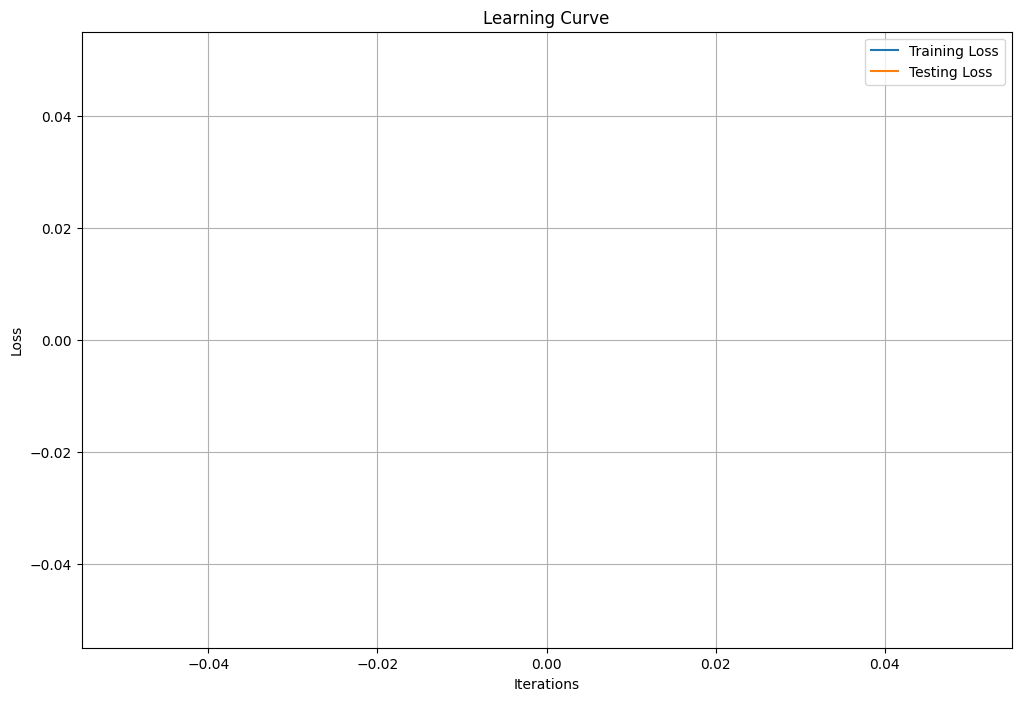

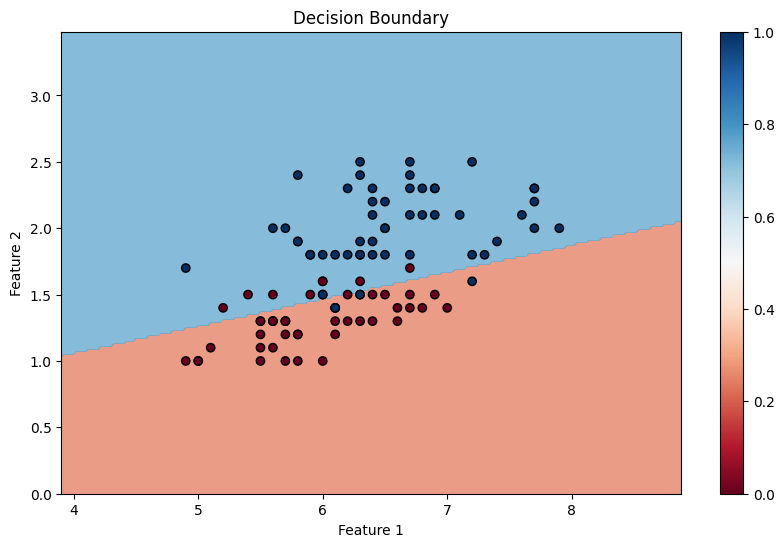

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class ScratchLogisticRegression:
    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False, lam=0.0):
        self.num_iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.lam = lam
        self.theta = None
        self.train_costs = []  # To store training costs
        self.test_costs = []   # To store testing costs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def add_bias(self, X):
        return np.c_[np.ones((X.shape[0], 1)), X]

    def _loss_func(self, pred, y):
        m = y.shape[0]
        error = -np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))
        loss = error / m
        if self.lam != 0:
            loss += (self.lam / (2 * m)) * np.sum(self.theta[1:]**2)
        return loss

    def _gradient_descent(self, X, y):
        m = y.shape[0]
        z = X.dot(self.theta)
        h = self.sigmoid(z)
        gradient = (1 / m) * X.T.dot(h - y)
        regularization_term = (self.lam / m) * np.r_[0, self.theta[1:]]
        self.theta -= self.lr * (gradient + regularization_term)

    def fit(self, X_train, y_train, X_test=None, y_test=None):
        if not self.no_bias:
            X_train = self.add_bias(X_train)
            if X_test is not None:
                X_test = self.add_bias(X_test)

        self.theta = np.zeros(X_train.shape[1])  # Initialize theta based on X_train's shape

        for i in range(self.num_iter):
            self._gradient_descent(X_train, y_train)

            if self.verbose and i % 100 == 0:
                z_train = X_train.dot(self.theta)
                h_train = self.sigmoid(z_train)
                cost_train = self._loss_func(h_train, y_train)
                self.train_costs.append(cost_train)

                if X_test is not None and y_test is not None:
                    z_test = X_test.dot(self.theta[:X_test.shape[1]])  # Ensure theta matches X_test's shape
                    h_test = self.sigmoid(z_test)
                    cost_test = self._loss_func(h_test, y_test)
                    self.test_costs.append(cost_test)
                    print(f"Iteration {i}, Test Cost: {cost_test}")

        # Plot learning curve
        plt.figure(figsize=(12, 8))
        plt.plot(np.arange(len(self.train_costs)), self.train_costs, label='Training Loss')
        if X_test is not None and y_test is not None:
            plt.plot(np.arange(len(self.test_costs)), self.test_costs, label='Testing Loss')
        plt.title('Learning Curve')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

    def predict_proba(self, X):
        if not self.no_bias:
            X = self.add_bias(X)
        return self.sigmoid(X.dot(self.theta[:X.shape[1]]))  # Ensure theta matches X's shape

    def predict(self, X):
        return self.predict_proba(X) >= 0.5

    def plot_decision_boundary(self, X, y):
        if X.shape[1] != 2:
            raise ValueError("Can only plot decision boundary for 2D feature space.")

        # Plotting decision boundary
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                               np.arange(x2_min, x2_max, 0.02))

        Z = self.predict(np.c_[xx1.ravel(), xx2.ravel()])
        Z = Z.reshape(xx1.shape)

        plt.figure(figsize=(10, 6))
        plt.contourf(xx1, xx2, Z, cmap=plt.cm.RdBu, alpha=0.8)

        # Plot the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Decision Boundary')
        plt.colorbar()
        plt.show()

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Filter for "versicolor" and "virginica"
df = df[df['species'].isin([1, 2])]

# Update features and target
X = df.drop(columns=['species']).values
y = df['species'].values

# Convert target to binary: 0 for "versicolor" and 1 for "virginica"
y = np.where(y == 1, 0, 1)

# Select two features for visualization (e.g., sepal length and petal width)
X_selected = X[:, [0, 3]]  # Change indices based on your choice of features

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Initialize and train the model
slr = ScratchLogisticRegression(num_iter=1000, lr=0.01, no_bias=False, verbose=False, lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)

# Plot decision boundary
slr.plot_decision_boundary(X_selected, y)


**Problem 5**

 Compare this with the scikit-learn implementation and see if it works correctly.

Use scikit-learn for indicator values such as Accuracy, Precision and Recall.

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Filter for "versicolor" and "virginica"
df = df[df['species'].isin([1, 2])]

# Update features and target
X = df.drop(columns=['species']).values
y = df['species'].values

# Convert target to binary: 0 for "versicolor" and 1 for "virginica"
y = np.where(y == 1, 0, 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train scikit-learn's Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, C=1.0, penalty='l2', solver='lbfgs')
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate metrics: Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.93
Precision: 0.92
Recall: 0.92


From scratch implementation is necessary define mathematical formulas for every process (sigmoid function, loss function, gradient descent). It let us enhances our understanding of how algorithms work internally.
Scikit-learn: Provides algorithms based on libraries, with optimized numerical computations.
From scratch in every iteration is possible to see the accuracy in contrast scikit-learn show the general accuracy rate.